# Cartesian Planning tutorial

We'll show cartesian planning on a panda robot.

If you want to see a simulation demo, check out the examples directory.

In [1]:
import numpy as np
import sys, os
import yaml
import trimesh
%matplotlib inline

parent_dir = os.path.dirname(os.getcwd())
pykin_path = parent_dir
sys.path.append(pykin_path)

from pykin.robots.single_arm import SingleArm
from pykin.kinematics.transform import Transform
from pykin.planners.cartesian_planner import CartesianPlanner
from pykin.collision.collision_manager import CollisionManager
from pykin.utils import plot_utils as plt
from pykin.utils.obstacle_utils import Obstacle

In [2]:
file_path = '../asset/urdf/panda/panda.urdf'
mesh_path = pykin_path+"/asset/urdf/panda/"
yaml_path = '../asset/config/panda_init_params.yaml'

In [3]:
robot = SingleArm(file_path, Transform(rot=[0.0, 0.0, 0.0], pos=[0, 0, 0]))
robot.setup_link_name("panda_link_0", "panda_right_hand")

with open(yaml_path) as f:
    controller_config = yaml.safe_load(f)
init_qpos = controller_config["init_qpos"]
fk = robot.forward_kin(np.array(init_qpos))

init_eef_pose = robot.get_eef_pose(fk)
goal_eef_pose = controller_config["goal_pos"]

In [4]:
c_manager = CollisionManager(mesh_path)
c_manager.setup_robot_collision(robot, fk)

milk_path = pykin_path+"/asset/objects/meshes/milk.stl"
milk_mesh = trimesh.load_mesh(milk_path)

obs = Obstacle()
o_manager = CollisionManager(milk_path)

In [5]:
task_plan = CartesianPlanner(
    robot, 
    self_collision_manager=c_manager,
    obstacle_collision_manager=o_manager,
    n_step=100,
    dimension=7)

In [6]:
joint_path, target_poses = task_plan.get_path_in_joinst_space(
    current_q=init_qpos,
    goal_pose=goal_eef_pose,
    resolution=0.1, 
    damping=0.03,
    pos_sensitivity=0.04)

if joint_path is None and target_poses is None:
    print("Cannot Visulization Path")
    exit()

[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000151


WorkingTime[get_path_in_joinst_space]: 0.8234 sec



In [7]:
joint_trajectory = []
eef_poses = []
for joint in joint_path:
    transformations = robot.forward_kin(joint)
    joint_trajectory.append(transformations)

print(f"Computed Goal Position : {joint_trajectory[-1][robot.eef_name].pose}")
print(f"Desired Goal position : {target_poses[-1]}")

Computed Goal Position : [ 2.99928297e-01 -5.70915989e-01  2.34257454e-01  2.69270088e-05
  9.97913021e-01  2.54093191e-04  6.45719534e-02]
Desired Goal position : [ 0.3        -0.57104895  0.23425477]


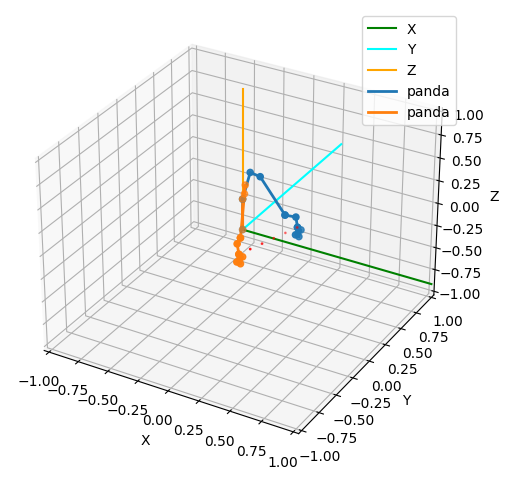

In [8]:

fig, ax = plt.init_3d_figure(figsize=(10,6), dpi= 100)

plt.plot_trajectories(ax, target_poses, size=1)
plt.plot_robot(
    robot,
    transformations=joint_trajectory[0], 
    ax=ax,
    visible_text=False)
plt.plot_robot(
    robot, 
    transformations=joint_trajectory[-1], 
    ax=ax, 
    visible_text=False,
    visible_basis=False)

plt.show_figure()

In [9]:
name="milk1"
obs_pos=[3.73820701e-01, -2.51826813e-01,  2.71833382e-01]

o_manager.add_object(name, gtype="mesh", gparam=milk_mesh, transform=Transform(pos=obs_pos).h_mat)
obs(name=name, gtype="mesh", gparam=milk_mesh, transform=Transform(pos=obs_pos))
o_manager.add_object(name="milk2", gtype="mesh", gparam=milk_mesh, transform=Transform(pos=[4.18720325e-01, -5.76662613e-02,  2.94687778e-01]).h_mat)
obs(name="milk2", gtype="mesh", gparam=milk_mesh, transform=Transform(pos=[4.18720325e-01, -5.76662613e-02,  2.94687778e-01]))

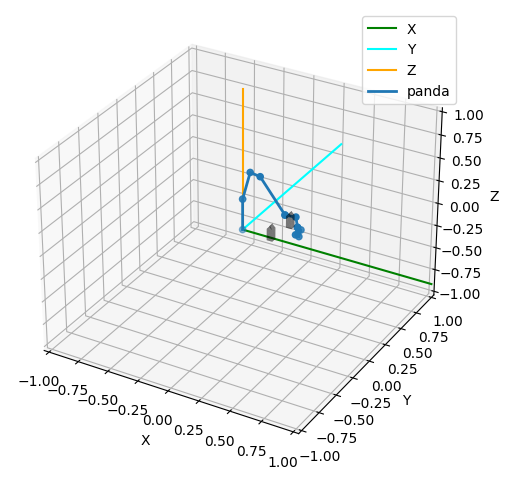

In [10]:

fig, ax = plt.init_3d_figure(figsize=(10,6), dpi= 100)
plt.plot_robot(
    robot,
    transformations=joint_trajectory[0], 
    ax=ax,
    visible_text=False)

plt.plot_obstacles(
    ax, obstacles=obs
)

plt.show_figure()

In [11]:
task_plan.obstacle_c_manager = o_manager

joint_path, target_poses = task_plan.get_path_in_joinst_space(
    current_q=init_qpos,
    goal_pose=goal_eef_pose,
    resolution=0.05, 
    damping=0.03,
    pos_sensitivity=0.04)

[ERROR] [Cartesian Planner]: Failed Generate Path.. Collision may occur.
[WARNING] [Cartesian Planner]: Collision Position : [ 0.444324 -0.00571   0.196247]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.442866 -0.011421  0.196631]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.441408 -0.017131  0.197015]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.43995  -0.022842  0.197399]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.438493 -0.028552  0.197783]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.437035 -0.034263  0.198167]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.435577 -0.039973  0.198551]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.434119 -0.045684  0.198935]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.432661 -0.051394  0.199319]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.429746 -0.062815  0.200086]
[WARNING] [Cartesian Planner]: Collision Position : [ 0.425372 -0.079947  0.201238]
[WA

CollisionError: Check the collision.. Conflict confirmed. Check the object position!, please check settings again